# Comparación con test

# Carga de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)


import joblib
import os

from sklearn.decomposition import PCA


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


## Cargo datos train

In [2]:
df_train = pd.read_csv('./data/df_final_precios_ordenadores.csv', index_col=0)
df_train.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_euros', 'Resolution_disc', 'Pantalla_disc', 'Family_disc',
       'Clock_speed_disc', 'Modelo_procesador_disc', 'Gpu Type',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc'],
      dtype='object')

In [3]:
df_train.shape

(912, 16)

In [4]:
df_train.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution_disc,Pantalla_disc,Family_disc,Clock_speed_disc,Modelo_procesador_disc,Gpu Type,Gpu_Brand_disc,GPU_model_disc,storage_type_disc
id,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,8,Windows 10,2.36,749.00,0,1,3,4,4,Dedicated,0,2,1
347,Asus,Notebook,15.6,4,Windows 10,2.00,449.00,0,1,0,0,0,Unknown,1,0,1
353,Toshiba,Notebook,13.3,8,Windows 7,1.20,1460.00,3,1,2,3,3,Unknown,1,2,3
578,Dell,Gaming,15.6,16,Windows 10,4.42,2868.99,9,4,3,6,6,Dedicated,2,10,3
42,Dell,Ultrabook,12.5,8,Windows 7,1.26,1713.37,3,1,2,1,4,Unknown,1,2,3
867,Asus,2 in 1 Convertible,15.6,12,Windows 10,2.26,1099.00,3,1,3,4,4,Dedicated,2,3,3
1136,Asus,Notebook,15.6,4,Linux,2.00,415.00,3,1,1,0,0,Unknown,1,2,3
609,MSI,Gaming,15.6,8,Windows 10,2.40,1142.80,3,1,3,6,6,Dedicated,2,3,3


# Cargo datos test

In [5]:
df_test = pd.read_csv('./data/df_test_disc_precios_ordenadores.csv',index_col=0)
df_test.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Resolution_disc', 'Pantalla_disc', 'Family_disc', 'Clock_speed_disc',
       'Modelo_procesador_disc', 'Gpu Type', 'Gpu_Brand_disc',
       'GPU_model_disc', 'storage_type_disc'],
      dtype='object')

In [6]:
df_test.shape

(391, 15)

In [7]:
df_test.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Resolution_disc,Pantalla_disc,Family_disc,Clock_speed_disc,Modelo_procesador_disc,Gpu Type,Gpu_Brand_disc,GPU_model_disc,storage_type_disc
id,,,,,,,,,,,,,,,
181,HP,Ultrabook,13.3,16,Windows 10,1.30,9.0,4,3.0,4.0,4.0,Unknown,1.0,2.0,3
708,Acer,Notebook,15.6,8,Windows 10,2.20,0.0,1,2.0,4.0,0.0,Dedicated,0.0,3.0,3
862,Acer,Notebook,15.6,4,Linux,2.40,0.0,1,1.0,0.0,0.0,Unknown,1.0,2.0,1
1064,HP,Notebook,14.0,8,Windows 7,1.43,3.0,1,2.0,3.0,3.0,Unknown,1.0,2.0,3
702,HP,Notebook,13.3,8,Windows 10,1.34,3.0,1,2.0,2.0,2.0,Unknown,1.0,2.0,3
585,Dell,2 in 1 Convertible,15.6,16,Windows 10,2.00,3.0,1,3.0,3.0,3.0,Unknown,1.0,2.0,3
195,Razer,Gaming,14.0,16,Windows 10,1.95,3.0,1,3.0,6.0,6.0,Dedicated,2.0,6.0,3
463,Asus,Notebook,15.6,4,Linux,2.10,3.0,1,2.0,2.0,2.0,Dedicated,2.0,3.0,1


Elimino la columna target Price_euros

In [8]:
X_train = df_train.drop(columns='Price_euros')
y_train = df_train['Price_euros']

In [9]:
features_list = X_train.columns.tolist()

df_test = df_test[features_list]

In [10]:
X_test = df_test

In [11]:
# Comprobar si las columnas de X_train y X_test son las mismas y están en el mismo orden
son_iguales = list(X_train.columns) == list(X_test.columns)

# Imprimir el resultado
print("Las columnas son las mismas y están en el mismo orden:", son_iguales)


Las columnas son las mismas y están en el mismo orden: True


## Cargo el modelo entrenado

In [24]:
#model_path = os.path.join('models', 'grid_search.pkl')
#grid_search_cat_scaled = joblib.load(model_path)

## Comparo contra test

In [12]:
features_cat = X_train.select_dtypes(include='object').columns.tolist()

X_train = pd.get_dummies(X_train, features_cat, dtype=int)
X_test = pd.get_dummies(X_test,features_cat,dtype=int)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       912 non-null    float64
 1   Ram                          912 non-null    int64  
 2   Weight                       912 non-null    float64
 3   Resolution_disc              912 non-null    int64  
 4   Pantalla_disc                912 non-null    int64  
 5   Family_disc                  912 non-null    int64  
 6   Clock_speed_disc             912 non-null    int64  
 7   Modelo_procesador_disc       912 non-null    int64  
 8   Gpu_Brand_disc               912 non-null    int64  
 9   GPU_model_disc               912 non-null    int64  
 10  storage_type_disc            912 non-null    int64  
 11  Company_Acer                 912 non-null    int32  
 12  Company_Apple                912 non-null    int32  
 13  Company_Asus          

In [14]:
X_train.shape

(912, 47)

In [15]:
X_test.shape

(391, 44)

In [16]:
# Comprobar si las columnas de X_train y X_test son las mismas y están en el mismo orden
son_iguales = list(X_train.columns) == list(X_test.columns)

# Imprimir el resultado
if son_iguales == True:
    print("Las columnas son las mismas y están en el mismo orden:", son_iguales)
else:
    col_diferentes = set(X_train)-set(X_test)
    print(col_diferentes)


{'OpSys_Android', 'Company_Fujitsu', 'Company_Mediacom'}


In [17]:
# Alineo las columnas añadiendo las faltantes con valor cero.
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [18]:
# Comprobar si las columnas de X_train y X_test son las mismas y están en el mismo orden
son_iguales = list(X_train.columns) == list(X_test.columns)

# Imprimir el resultado
if son_iguales == True:
    print("Las columnas son las mismas y están en el mismo orden:", son_iguales)
else:
    col_diferentes = set(X_train)-set(X_test)
    print(col_diferentes)


Las columnas son las mismas y están en el mismo orden: True


In [19]:
X_train.shape

(912, 47)

In [20]:
X_test.shape

(391, 47)

_____

He conseguido sacar la optimización del gbr_4

In [21]:
# Cargo el modelo entrenado
model_path = os.path.join('models', 'gbr_grid_4.pkl')
gbr_grid_4 = joblib.load(model_path)

In [22]:

features_selector = ['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_LG',
       'Company_Lenovo', 'Company_Razer', 'TypeName_2 in 1 Convertible',
       'TypeName_Gaming', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Windows 10', 'OpSys_Windows 7']

In [23]:
X_train.shape

(912, 47)

In [24]:
X_test.shape

(391, 47)

Tengo que escalar las variables

In [25]:
features_scaled = X_train.select_dtypes(include=(['int','float'])).columns.tolist()

print(features_scaled)
scaler = StandardScaler()

temp_x_train = scaler.fit_transform(X_train[features_scaled])
X_train_scaled = X_train.copy()
X_train_scaled[features_scaled] = temp_x_train


temp_x_test = scaler.transform(X_test[features_scaled])
X_test_scaled = X_test.copy()
X_test_scaled[features_scaled] = temp_x_test



['Clock_speed_disc', 'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Family_disc', 'GPU_model_disc', 'Gpu Type_Dedicated', 'Gpu Type_Unknown', 'Gpu_Brand_disc', 'Inches', 'Modelo_procesador_disc', 'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'Pantalla_disc', 'Ram', 'Resolution_disc', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'Weight', 'storage_type_disc']


In [30]:
X_test_model_cat = X_test_scaled[features_selector]
y_predict_gbr_4 = gbr_grid_4.predict(X_test_model_cat)
y_predict_gbr_4

array([2181.24938015,  614.55984353,  366.68121221, 1456.92110932,
       1091.488114  , 1397.09928079, 2948.1788443 ,  544.34991962,
       1806.38035691, 1903.66753373, 1361.30802624,  528.78402288,
        251.36585958,  644.68140578,  386.50982427, 1494.64688908,
        381.55021999, 2134.34042511, 1662.96342311, 1543.59290887,
       1326.21517609, 1372.55263567, 1849.13410473, 1377.226407  ,
       1789.85543661,  386.81729298,  949.65896049,  315.46827836,
       1068.58672599,  519.68966336,  982.74445763, 1193.45757691,
       2001.88883118,  330.82216334,  650.9389389 , 1564.26657136,
        821.49501938,  682.18749223, 3056.93662758,  620.4413043 ,
        595.07883929,  990.73764162,  804.84081252, 1984.49188436,
        892.05816533, 1682.92016967,  474.40201523, 3294.77160032,
        286.90261984, 1263.24286345, 1109.24695943,  978.59179641,
        916.27555565,  357.88873624, 1107.49077966,  780.25097311,
        901.18839567,  254.07896334, 1616.89595179, 1057.09594

## Cargo sample_submission

In [31]:
sample= pd.read_csv('./data/sample_submission.csv')
sample.head(8)

,id,Price_euros
0,1014,752.00
1,845,499.00
2,1151,1747.00
3,1265,245.00
4,573,1179.00
5,521,340.00
6,316,403.00
7,133,1545.64


In [32]:
sample['id'] = X_test_scaled.index
sample['Price_euros'] = y_predict_gbr_4.round(2)

In [33]:
sample

,id,Price_euros
0,181,2181.25
1,708,614.56
2,862,366.68
3,1064,1456.92
4,702,1091.49
...,...,...
386,1281,973.67
387,524,1253.65
388,1015,541.85
389,1236,699.98


In [34]:
sample.to_csv('./data/submission_gbr_4.csv',index=False)

In [35]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")

In [36]:
chequeator(sample)

You're ready to submit!


NameError: name 'submission' is not defined

___

In [86]:
X_train_model = X_train_scaled[features_selector]

gb= GradientBoostingRegressor(max_depth=5, random_state=42)

param_grid_gb_reg = {
    'n_estimators': [100, 200,300],
    'max_depth': [5,6,7],
    'learning_rate': [0.08, 0.1,0.2],
    'subsample': [0.2, 0.5, 1.0]
    
}

gbr_grid = GridSearchCV(estimator=gb,
                     param_grid=param_grid_gb_reg, 
                     scoring='neg_mean_absolute_error', 
                     cv=5, 
                     n_jobs=-1)

gbr_grid.fit(X_train_model, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.1, 0.2],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.2, 0.5, 1.0]},
             scoring='neg_mean_absolute_error')

In [87]:
best_model_gb_reg = gbr_grid.best_estimator_
best_params_gb_reg = gbr_grid.best_params_
best_score_gb_reg = gbr_grid.best_score_

print(f'Best Parameters for Regression: {best_params_gb_reg}')
print(f'Best Score for Regression: {best_score_gb_reg}')

Best Parameters for Regression: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.5}
Best Score for Regression: -163.4830373325415


In [80]:
X_test_model_cat = X_test_scaled[features_selector]
y_predict_gbr = gbr_grid.predict(X_test_model_cat)
y_predict_gbr

array([1953.96155957,  680.40443031,  330.87811478, 1461.21441152,
       1224.29997146, 1382.58331509, 3084.37137331,  609.59335424,
       2125.86873998, 2055.64839155, 1443.12419777,  539.52699939,
        262.56292379,  706.8089067 ,  372.3468642 , 1492.02945039,
        376.72190271, 2050.12903531, 1635.48839843, 1583.34119704,
       1555.71350559, 1444.26477484, 1754.46155536, 1474.97068251,
       1807.48169323,  392.60862927,  952.89596923,  308.5227573 ,
       1087.32622896,  514.91912539,  975.48975527, 1176.12224581,
       2017.40280012,  307.65620598,  657.03746402, 1531.63214134,
        817.146441  ,  626.36104517, 3121.45287572,  625.6517889 ,
        598.03836972,  933.48336684,  841.63615082, 1938.22531734,
        937.69219971, 1682.86901336,  454.21292599, 3189.38156395,
        308.8425973 , 1336.222141  , 1135.16672874,  949.05656358,
        938.58442419,  345.43788186, 1085.66853691,  774.32990871,
        866.87537493,  259.16956199, 1653.86872122, 1103.50270

## Cargo sample_submission

In [81]:
sample= pd.read_csv('./data/sample_submission.csv')
sample.head(8)

,id,Price_euros
0,1014,752.00
1,845,499.00
2,1151,1747.00
3,1265,245.00
4,573,1179.00
5,521,340.00
6,316,403.00
7,133,1545.64


In [82]:
sample['id'] = X_test_scaled.index
sample['Price_euros'] = y_predict_gbr.round(2)

In [83]:
sample

,id,Price_euros
0,181,1953.96
1,708,680.40
2,862,330.88
3,1064,1461.21
4,702,1224.30
...,...,...
386,1281,878.09
387,524,1412.56
388,1015,511.94
389,1236,572.03


In [84]:
sample.to_csv('./data/submission_gbr.csv',index=False)

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")

In [85]:
chequeator(sample)

You're ready to submit!


NameError: name 'submission' is not defined

___

Pruebo con PCA (Análisis de Componenetes Principales)

In [103]:
pca_cl = PCA()

pca_cl.fit(X_train_scaled)

X_train_pca = pca_cl.transform(X_train_scaled)

In [104]:
X_train_pca.shape

(912, 47)

In [105]:
df_pca = pd.DataFrame(
    data = pca_cl.components_,
    columns=X_train_scaled.columns,
    index=[f'PC{n}' for n in range(1,X_train_scaled.shape[1]+1)]
)

df_pca

,Clock_speed_disc,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,...,Ram,Resolution_disc,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Weight,storage_type_disc
PC1,2.954171e-01,-0.063326,0.022865,0.025737,-0.025292,0.041572,-0.012012,0.002571,-0.052651,-0.005349,...,3.002293e-01,2.198942e-01,-0.034761,0.277887,-0.066202,-0.200584,0.015610,0.088820,2.237915e-01,1.877477e-01
PC2,7.134466e-02,-0.084461,0.285703,-0.069313,-0.017028,-0.030654,-0.013878,0.069779,-0.015868,0.032576,...,5.610386e-02,2.342483e-01,0.147819,-0.126921,0.048767,-0.268737,0.360861,0.009466,-3.277658e-01,1.181986e-01
PC3,-1.677133e-02,0.074688,0.427729,-0.039017,0.009702,0.069550,-0.014625,-0.010846,-0.050694,-0.029666,...,-4.995178e-02,3.304550e-02,-0.264145,-0.044555,-0.070462,0.174062,0.031969,0.028418,1.192172e-01,-2.005278e-01
PC4,2.832158e-02,0.027320,-0.119168,0.047279,-0.026339,-0.051502,-0.015982,0.074905,-0.039268,-0.002903,...,-2.334261e-02,-6.502769e-02,-0.049579,0.054782,0.019558,-0.067257,0.071256,0.002494,9.743635e-03,3.533024e-02
PC5,5.612465e-02,0.213664,0.065768,0.161400,-0.003140,-0.262611,-0.030274,0.194327,-0.104654,-0.016788,...,5.146549e-03,-1.486124e-01,0.123718,0.259319,0.290370,-0.256797,-0.077164,-0.072937,2.908636e-02,-1.858435e-01
PC6,6.538733e-02,-0.123371,-0.185307,-0.234155,-0.053450,-0.138482,-0.020896,0.071626,0.119411,-0.026192,...,6.230975e-03,5.572153e-02,0.109094,-0.130876,-0.060595,0.070915,-0.111220,0.194457,-6.987177e-03,1.005995e-01
PC7,9.129614e-02,0.146538,-0.227628,-0.099576,-0.056786,0.456791,-0.036946,0.220947,-0.028367,0.007371,...,2.971466e-02,1.652924e-02,0.021941,-0.100292,0.133923,-0.048055,0.051554,0.133457,-3.807623e-02,3.806496e-02
PC8,-6.944936e-02,0.000879,-0.040338,0.055161,-0.008655,0.270673,-0.042219,-0.038914,-0.585675,0.004670,...,9.018279e-02,1.251631e-01,0.291939,0.043041,-0.147435,-0.058647,-0.042631,-0.273302,-2.320715e-03,5.926527e-02
PC9,1.342503e-02,-0.042473,-0.072295,0.060898,-0.066000,-0.086461,0.024999,0.162929,-0.142925,0.118097,...,2.037348e-02,-6.909272e-02,-0.386088,0.024176,-0.022662,0.064033,0.331571,-0.309610,-9.101244e-02,2.184169e-01
PC10,-7.501384e-02,0.248196,-0.097431,-0.197308,0.089930,-0.116390,-0.017084,0.221252,-0.026192,-0.008602,...,9.774638e-02,2.876322e-01,-0.133026,-0.086130,0.122117,0.164069,-0.082220,0.018349,3.723144e-02,3.786531e-02


In [106]:
pca_cl.explained_variance_ratio_

array([1.41128350e-01, 7.98983283e-02, 4.90887952e-02, 4.17383079e-02,
       3.80482900e-02, 3.65269879e-02, 3.36676658e-02, 3.23681003e-02,
       2.76557865e-02, 2.72561694e-02, 2.63687692e-02, 2.41764319e-02,
       2.37596720e-02, 2.31703853e-02, 2.27554097e-02, 2.25538696e-02,
       2.18976020e-02, 2.17866237e-02, 2.16497033e-02, 2.14245863e-02,
       2.13449544e-02, 2.13329862e-02, 2.07606190e-02, 2.01068632e-02,
       1.87651490e-02, 1.75027979e-02, 1.69173057e-02, 1.59585889e-02,
       1.57556982e-02, 1.46220200e-02, 1.26428633e-02, 1.14411620e-02,
       1.07545595e-02, 9.84958331e-03, 7.32475415e-03, 6.32065039e-03,
       5.91442606e-03, 4.88651800e-03, 4.17745278e-03, 2.77605577e-03,
       2.08166063e-03, 1.84349746e-03, 2.78326595e-32, 1.48552665e-33,
       6.72530579e-34, 6.72530579e-34, 6.22756262e-34])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.14112835 0.22102668 0.27011547 0.31185378 0.34990207 0.38642906
 0.42009672 0.45246483 0.48012061 0.50737678 0.53374555 0.55792198
 0.58168165 0.60485204 0.62760745 0.65016132 0.67205892 0.69384554
 0.71549525 0.73691983 0.75826479 0.77959777 0.80035839 0.82046526
 0.83923041 0.8567332  0.87365051 0.8896091  0.9053648  0.91998682
 0.93262968 0.94407084 0.9548254  0.96467498 0.97199974 0.97832039
 0.98423482 0.98912133 0.99329879 0.99607484 0.9981565  1.
 1.         1.         1.         1.         1.        ]


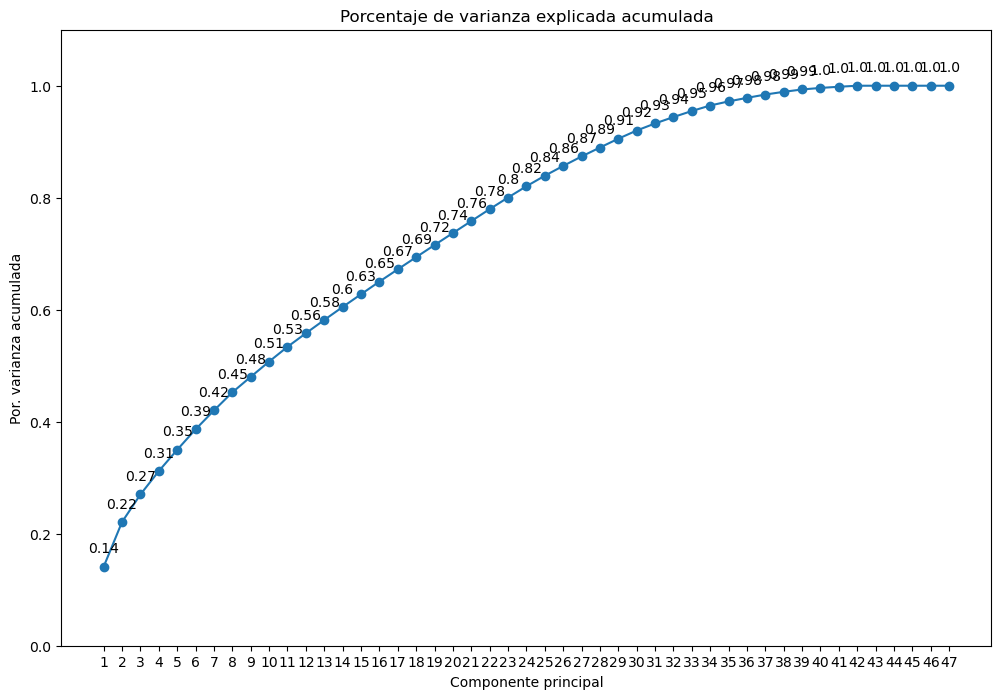

In [107]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_cl.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax.plot(
    np.arange(len(X_train_scaled.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_train_scaled.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_cl.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [109]:
rf_pca = RandomForestRegressor (max_depth=5, random_state=42) 
scores_pca = []
for num_PCs in range(5,10):
    print(f"Probando con {num_PCs} componentes:", sep = " ")
    X_train_pca_reduced = X_train_pca[:,:num_PCs]# Array de numpy. Al estar ordenadas me quedo con las que quiero.
    score_pca = np.mean(cross_val_score(rf_pca, X_train_pca_reduced, y_train, cv = 5, scoring = "neg_mean_absolute_error"))
    print(score_pca)
    scores_pca.append(score_pca)

Probando con 5 componentes:
-205.01144421907026
Probando con 6 componentes:
-202.74230179663726
Probando con 7 componentes:
-202.68706063727404
Probando con 8 componentes:
-202.18122446731007
Probando con 9 componentes:
-202.84314054565


In [59]:
rf_pca = RandomForestRegressor (max_depth=5, random_state=42) 
scores_pca = []
for num_PCs in range(38,46):
    print(f"Probando con {num_PCs} componentes:", sep = " ")
    X_train_pca_reduced = X_train_pca[:,:num_PCs]# Array de numpy. Al estar ordenadas me quedo con las que quiero.
    score_pca = np.mean(cross_val_score(rf_pca, X_train_pca_reduced, y_train, cv = 5, scoring = "neg_mean_absolute_error"))
    print(score_pca)
    scores_pca.append(score_pca)

Probando con 38 componentes:
-196.22529335107453
Probando con 39 componentes:
-196.98553754516942
Probando con 40 componentes:
-196.87883573959718
Probando con 41 componentes:
-195.6867958931843
Probando con 42 componentes:
-196.04118831956694
Probando con 43 componentes:
-196.08917799299496
Probando con 44 componentes:
-195.99207253081607
Probando con 45 componentes:
-196.0277989861095


Pues aparentemente no mejoro los otros modelos

___

In [93]:
X_train_model = X_train_scaled

gb= GradientBoostingRegressor(max_depth=5, random_state=42)

param_grid_gb_reg = {
    'n_estimators': [100, 200,300],
    'max_depth': [6,7,8],
    'learning_rate': [0.07,0.08, 0.09],
    'subsample': [0.2, 0.5, 1.0]
    
}

gbr_grid_all = GridSearchCV(estimator=gb,
                     param_grid=param_grid_gb_reg, 
                     scoring='neg_mean_absolute_error', 
                     cv=5, 
                     n_jobs=-1)

gbr_grid_all.fit(X_train_model, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.08, 0.09],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.2, 0.5, 1.0]},
             scoring='neg_mean_absolute_error')

In [94]:
best_model_gb_reg = gbr_grid_all.best_estimator_
best_params_gb_reg = gbr_grid_all.best_params_
best_score_gb_reg = gbr_grid_all.best_score_

print(f'Best Parameters for Regression: {best_params_gb_reg}')
print(f'Best Score for Regression: {best_score_gb_reg}')

Best Parameters for Regression: {'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
Best Score for Regression: -158.06755669177548


Overfitting: luego a la hora de picarlo en Kaggle se va a 174€ el error

In [96]:
y_predict_gbr_all = gbr_grid_all.predict(X_test_scaled)
y_predict_gbr_all

array([2015.40141864,  589.54316697,  370.8093447 , 1425.91268129,
       1058.82922029, 1297.55001043, 3088.64231585,  628.53796948,
       2051.05462029, 2158.07221924, 1445.47075529,  557.20417132,
        271.75434007,  716.17874077,  396.88770411, 1495.59586989,
        299.38838211, 2045.77482369, 1687.1244533 , 1582.80317655,
       1518.35436799, 1406.26537821, 1744.09141338, 1474.02577092,
       1764.15991319,  373.2508458 ,  998.63722918,  310.97837104,
       1143.67769515,  516.12942277,  964.59758402, 1335.56679557,
       2002.1627439 ,  304.11595401,  665.74226015, 1557.05658192,
        823.43284286,  620.42646791, 3134.43292   ,  629.98358721,
        705.04070702,  965.09283348,  949.52918572, 1915.54332151,
        896.03681442, 1704.44442429,  471.48906144, 3033.48897477,
        301.2962905 , 1349.023554  , 1163.21881342,  930.8330754 ,
        941.94826327,  315.91068587, 1210.63484312,  746.06689757,
        918.86434731,  231.82274434, 1538.97620926, 1080.28832

## Cargo sample_submission

In [95]:
sample= pd.read_csv('./data/sample_submission.csv')
sample.head(8)

,id,Price_euros
0,1014,752.00
1,845,499.00
2,1151,1747.00
3,1265,245.00
4,573,1179.00
5,521,340.00
6,316,403.00
7,133,1545.64


In [97]:
sample['id'] = X_test_scaled.index
sample['Price_euros'] = y_predict_gbr_all.round(2)

In [98]:
sample

,id,Price_euros
0,181,2015.40
1,708,589.54
2,862,370.81
3,1064,1425.91
4,702,1058.83
...,...,...
386,1281,960.29
387,524,1330.80
388,1015,467.75
389,1236,608.55


In [99]:
sample.to_csv('./data/submission_gbr_all.csv',index=False)

In [100]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")

In [101]:
chequeator(sample)

You're ready to submit!


NameError: name 'submission' is not defined

___

Voy a probar el CatBoost con más variables que de primeras ha dado buen resultado en el cross_val_score

In [110]:
selector_model_plus =['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 7']

In [112]:
cat = CatBoostRegressor(depth=6, random_state=42,verbose=0)

X_train_model = X_train[selector_model_plus]

param_grid = {
    'depth': [6, 7,8],
    'learning_rate': [0.03,0.05,0.06],
    'iterations': [1300,1400,1500]
}

# Instanciamos GridSearchCV
cat_grid = GridSearchCV(estimator=cat,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           verbose=0)

# Ejecutamos el ajuste de hiperparámetros
cat_grid.fit(X_train_model, y_train)

# Imprimimos los mejores parámetros encontrados
print(f'Mejores hiperparámetros: {cat_grid.best_params_}')
print(f'Mejor MAE: {cat_grid.best_score_}')

Mejores hiperparámetros: {'depth': 7, 'iterations': 1300, 'learning_rate': 0.05}
Mejor MAE: -156.98858352221058


In [113]:
import joblib
import os

model_path = os.path.join('models', 'cat_grid.pkl')
joblib.dump(cat_grid, model_path)

['models\\cat_grid.pkl']

In [116]:
y_predict_cat_plus = cat_grid.predict(X_test)
y_predict_cat_plus

array([2133.40272484,  810.67894457,  344.83589186, 1464.69409544,
       1158.64419268, 1366.15080473, 3049.58240801,  566.84440122,
       1781.93811542, 2244.65850382, 1424.50770821,  518.74958805,
        259.61036321,  684.53642152,  427.28756378, 1443.56049461,
        319.75145672, 2061.51239328, 1644.35178473, 1488.036824  ,
       1515.40646127, 1311.56656004, 1761.66972553, 1414.83978608,
       1781.25412147,  594.00628234,  917.3442165 ,  327.05845144,
       1134.2283925 ,  530.18828858,  965.84167292, 1199.63796475,
       2017.82709381,  327.96053142,  645.85355442, 1511.59063482,
        795.98573861,  619.3848214 , 3162.53589822,  730.35060895,
        596.95245545,  912.24901359,  982.07604616, 1946.62682977,
        904.08871028, 1756.65619822,  517.75360852, 2901.58592447,
        319.54765808, 1338.18814905, 1119.68908584,  927.82491685,
        947.59245344,  326.81562344, 1050.02847779,  699.56919486,
        742.2691088 ,  245.04882237, 1578.57832352, 1102.13128

## Cargo sample_submission

In [117]:
sample= pd.read_csv('./data/sample_submission.csv')
sample.head(8)

,id,Price_euros
0,1014,752.00
1,845,499.00
2,1151,1747.00
3,1265,245.00
4,573,1179.00
5,521,340.00
6,316,403.00
7,133,1545.64


In [118]:
sample['id'] = X_test_scaled.index
sample['Price_euros'] = y_predict_cat_plus.round(2)

In [119]:
sample

,id,Price_euros
0,181,2133.40
1,708,810.68
2,862,344.84
3,1064,1464.69
4,702,1158.64
...,...,...
386,1281,917.22
387,524,1385.46
388,1015,485.24
389,1236,539.23


In [120]:
sample.to_csv('./data/submission_cat_2.csv',index=False)

In [121]:
chequeator(sample)

You're ready to submit!


NameError: name 'submission' is not defined